# 텍스트 파일 읽기

블로그 글 (https://cyc1am3n.github.io/2018/11/10/classifying_korean_movie_review.html) 을 참고하여 작성하였습니다.

NSMC (Naver sentiment movie corpus) 데이터는 원래 JSON 파일로 제공되지만

오픈 소스 데이터 (https://github.com/e9t/nsmc/) 를 통해 txt 파일로 다운로드하였다.

이제 이 텍스트 파일을 먼저 읽어 보겠다.

In [41]:
import json
import os
import nltk
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
%matplotlib inline
from konlpy.tag import Okt

In [8]:
def read_data(file):
    with open(file, 'r') as f:
        data = [line.split('\t') for line in f.read().splitlines()][1:]
    return data

In [9]:
train_data = read_data('ratings_train.txt')
test_data = read_data('ratings_test.txt')

In [10]:
print(len(train_data))
print(len(train_data[0]))

150000
3


In [11]:
print(len(test_data))
print(len(test_data[0]))

50000
3


# 형태소 분석 및 품사 태깅

문장 단위의 데이터를 단어 단위로 분석하고, 불용어를 제거하기 위해서는 전처리 과정이 필요하다.

이 단계에서 맞춤법이나 띄어쓰기를 교정해 줄 필요도 있다.

KoNLPy 라이브러리를 이용하여 이 작업을 수행할 수 있다.

In [26]:
okt = Okt()
print(okt.pos(u'커피 한 잔 어때요?'))

[('커피', 'Noun'), ('한', 'Verb'), ('잔', 'Noun'), ('어때요', 'Adjective'), ('?', 'Punctuation')]


In [31]:
def tokenize(doc):
    return ['/'.join(t) for t in okt.pos(doc, norm=True, stem=True) \
            if t[1] in ['Noun', 'Verb', 'Adjective', 'Adverb', 'VerbPrefix', 'KoreanParticle']]

## 학습 데이터 형태소 분석 및 품사 태깅

In [32]:
if os.path.isfile('train_docs.json'):
    with open('train_docs.json') as f_read:
        train_docs = json.load(f_read)
else:
    train_docs = [(tokenize(row[1]), row[2]) for row in train_data]
    with open('train_docs.json', 'w', encoding='utf-8') as f_write:
        json.dump(train_docs, f_write, ensure_ascii=False, indent='\t')

## 테스트 데이터 형태소 분석 및 품사 태깅

In [33]:
if os.path.isfile('test_docs.json'):
    with open('test_docs.json') as f_read:
        test_docs = json.load(f_read)
else:
    test_docs = [(tokenize(row[1]), row[2]) for row in test_data]
    with open('test_docs.json', 'w', encoding='utf-8') as f_write:
        json.dump(test_docs, f_write, ensure_ascii=False, indent='\t')

In [35]:
print(train_docs[:50])

[(['더빙/Noun', '진짜/Noun', '짜증나다/Adjective', '목소리/Noun'], '0'), (['흠/Noun', '포스터/Noun', '보고/Noun', '초딩/Noun', '영화/Noun', '줄/Noun', '오버/Noun', '연기/Noun', '가볍다/Adjective', '않다/Verb'], '1'), (['무재/Noun', '밓었/Noun', '다그/Noun', '래서/Noun', '보다/Verb', '추천/Noun', '다/Adverb'], '0'), (['교도소/Noun', '이야기/Noun', '구먼/Noun', '솔직하다/Adjective', '재미/Noun', '없다/Adjective', '평점/Noun', '조정/Noun'], '0'), (['몬페/Noun', '의/Noun', '익살스럽다/Adjective', '연기/Noun', '돋보이다/Verb', '영화/Noun', '스파이더맨/Noun', '늙다/Verb', '보이다/Verb', '하다/Verb', '커스틴/Noun', '던스트/Noun', '너무나도/Adverb', '이쁘다/Adjective', '보이다/Verb'], '1'), (['막/Noun', '걸음/Noun', '마/Noun', '떼다/Verb', '세/Noun', '초등학교/Noun', '학년/Noun', '생인/Noun', '살다/Verb', '영화/Noun', 'ㅋㅋㅋ/KoreanParticle', '반개/Noun', '아깝다/Adjective', '움/Noun'], '0'), (['원작/Noun', '긴장감/Noun', '제대로/Noun', '살리다/Verb', '하다/Verb'], '0'), (['별/Noun', '반개/Noun', '아깝다/Adjective', '욕/Noun', '나오다/Verb', '이응경/Noun', '길용우/Noun', '생활/Noun', '년/Noun', '정말/Noun', '발/Noun', '해도/Noun', '그것/Noun', '낫다/Verb', '납치/Noun',

In [36]:
print(test_docs[:50])

[(['굳다/Adjective', 'ㅋ/KoreanParticle'], '1'), ([], '0'), (['뭐/Noun', '이/Noun', '평점/Noun', '나쁘다/Adjective', '않다/Verb', '점/Noun', '짜다/Verb', '리/Noun', '더/Noun', '더욱/Noun', '아니다/Adjective'], '0'), (['지루하다/Adjective', '않다/Verb', '완전/Noun', '막장/Noun', '임/Noun', '돈/Noun', '주다/Verb', '보기/Noun'], '0'), (['만/Noun', '아니다/Adjective', '별/Noun', '다섯/Noun', '개/Noun', '주다/Verb', '왜/Noun', '로/Noun', '나오다/Verb', '제/Noun', '심기/Noun', '불편하다/Adjective', '하다/Verb'], '0'), (['음악/Noun', '주가/Noun', '되다/Verb', '최고/Noun', '음악/Noun', '영화/Noun'], '1'), (['진정하다/Adjective', '쓰레기/Noun'], '0'), (['마치/Noun', '미국/Noun', '애니/Noun', '튀어나오다/Verb', '창의력/Noun', '없다/Adjective', '로봇/Noun', '디자인/Noun', '고개/Noun', '젖다/Verb', '하다/Verb'], '0'), (['갈수록/Noun', '개판/Noun', '되다/Verb', '중국영화/Noun', '유치하다/Adjective', '내용/Noun', '없다/Adjective', '폼/Noun', '잡다/Verb', '끝나다/Verb', '말/Noun', '안되다/Adjective', '무기/Noun', '유치하다/Adjective', '남무/Noun', '그리다/Verb', '동사서독/Noun', '같다/Adjective', '영화/Noun', '것/Noun', '류/Noun', '류작/Noun'], '0'), (['이별/

# 토큰화

문자열 분석을 위해 토큰 단위로 쪼개어서 NLTK 라이브러리를 통한 전처리를 수행한다.

구체적으로는 토큰의 수, 중복 제외한 토큰의 수, 빈도 상위 10개 토큰, 빈도 상위 50개 토큰 시각화를 수행한다.

In [37]:
tokens = [t for d in train_docs for t in d[0]]
print(len(tokens))

1435346


In [38]:
text = nltk.Text(tokens, name='NMSC')
print(len(set(text.tokens)))

41793


In [39]:
print(text.vocab().most_common(10))

[('영화/Noun', 50818), ('하다/Verb', 41209), ('보다/Verb', 38538), ('없다/Adjective', 15635), ('있다/Adjective', 12496), ('좋다/Adjective', 12154), ('너무/Adverb', 11158), ('재밌다/Adjective', 10410), ('정말/Noun', 9658), ('것/Noun', 9359)]


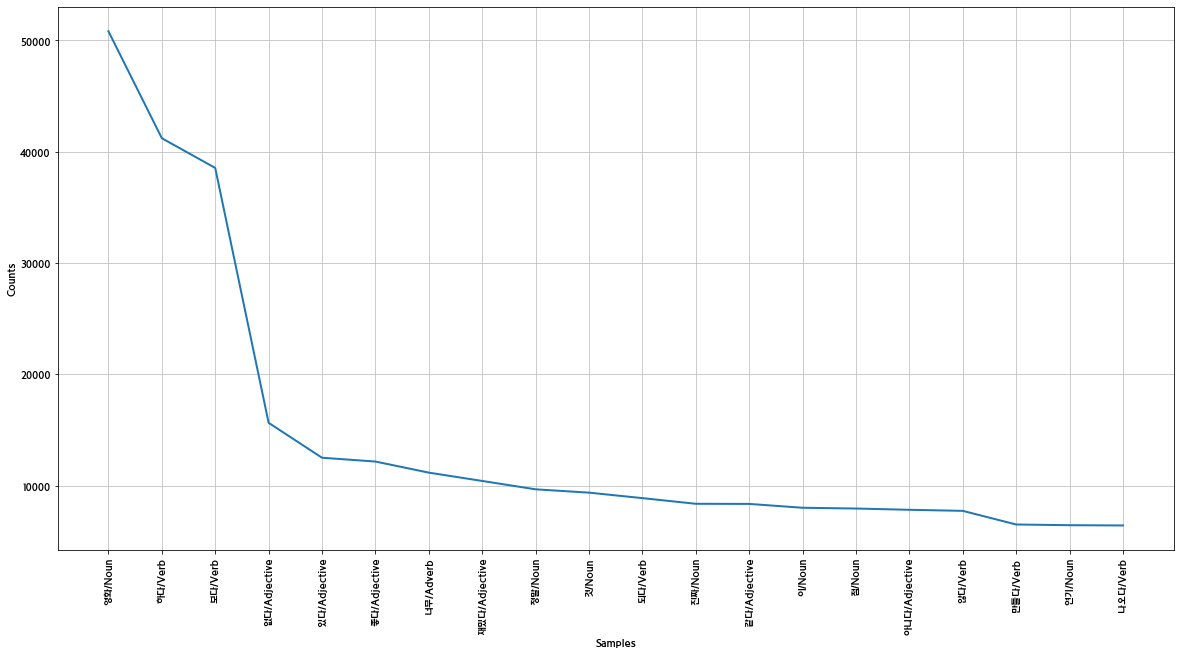

In [40]:
font_fname = '/Users/jeongjoo/Library/Fonts/KUCentennial.ttf'
font_name = font_manager.FontProperties(fname=font_fname).get_name()
rc('font', family=font_name)

plt.figure(figsize=(20,10))
text.plot(20)

# 벡터화

자주 사용하는 토큰 10000개를 사용해서 데이터를 벡터로 표현한다.

BOW (Bag of Words) 방식으로 구현하며, CountVectorization을 사용한다.

마지막으로 numpy를 이용해 float으로 형 변환 작업을 수행하여 저장한다.

In [42]:
selected_words = [f[0] for f in text.vocab().most_common(5000)]

def term_frequency(doc):
    return [doc.count(word) for word in selected_words]

In [43]:
train_x = [term_frequency(d) for d, _ in train_docs]
test_x = [term_frequency(d) for d, _ in test_docs]
train_y = [c for _, c in train_docs]
test_y = [c for _, c in test_docs]

In [45]:
print(train_x[:50])

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [46]:
print(test_x[:50])

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [47]:
print(train_y[:50])

['0', '1', '0', '0', '1', '0', '0', '0', '1', '1', '1', '1', '0', '1', '0', '1', '1', '0', '1', '1', '1', '1', '0', '1', '0', '0', '1', '0', '1', '1', '1', '0', '1', '0', '1', '1', '0', '1', '0', '1', '1', '0', '1', '1', '1', '0', '0', '0', '0', '1']


In [48]:
print(test_y[:50])

['1', '0', '0', '0', '0', '1', '0', '0', '0', '1', '1', '0', '1', '1', '0', '1', '1', '0', '1', '0', '1', '0', '1', '1', '0', '1', '1', '1', '0', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '1', '1']


In [49]:
x_train = np.asarray(train_x).astype('float32')
x_test = np.asarray(test_x).astype('float32')

np.save('x_train', x_train)
np.save('x_test', x_test)

y_train = np.asarray(train_y).astype('float32')
y_test = np.asarray(test_y).astype('float32')

np.save('y_train', y_train)
np.save('y_test', y_test)